# Сборный проект №1

## Цель проекта

Выявить определяющие успешность игры закономерности.

1. [Изучение общей информации.](#step_1)
2. [Подготовка данных.](#step_2)
3. [Исследовательский анализ данных.](#step_3)
4. [Портрет пользователя каждого региона.](#step_4)
    - [Портрет пользователя NA.](#step_4_1)
    - [Портрет пользователя EU.](#step_4_2)
    - [Портрет пользователя JP.](#step_4_3)
5. [Проверка гипотез.](#step_5)
6. [Общий вывод.](#step_6)

<a id="step_1"></a>
# 1. Изучение общей информации.

Импортируем нужные библиотеки, загрузим полученные данные и изучим их.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод по разделу 1

Как видно, данные имеют "шороховатости". Необходимо привести название колонок к нижнему регистру, поменять тип данных некоторых столбцов, подставить значения на места пропусков, где это возможно, и подсчетать дополнительные значения.

<a id="step_2"></a>
# 2. Подготовка данных.

- Сделаем более удобные названия столбцов.

In [3]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
              'jp_sales', 'other_sales', 'critic_score', 'user_score', 'raiting']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Проверим данные на наличие дубликатов.

In [4]:
df.duplicated().sum()

0

- Заменим тип данных.

In [5]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Подсчетаем общие продажи по миру.

In [6]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


- Разберемся со столбцом `user_score`

Посмотрим уникальные значения этого стобца.

In [7]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Как видно, есть выделяющееся значение, сделаем срез по этому значению и изучим его более детально.

In [8]:
df.query('user_score == "tbd"').sort_values(by='jp_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
12255,Interactive Storybook DS Series 1,DS,2007,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E,0.06
12256,Frogger Advance: The Great Quest,GBA,2002,Action,0.05,0.02,0.00,0.00,55.0,tbd,E,0.07
12261,The Tale of Despereaux,DS,2008,Platform,0.06,0.00,0.00,0.00,75.0,tbd,E,0.06
12262,Jam Sessions 2,DS,2009,Misc,0.06,0.00,0.00,0.00,66.0,tbd,E10+,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
6680,Karaoke Joysound Wii,Wii,2008,Misc,0.00,0.00,0.25,0.00,NaN,tbd,E10+,0.25
4476,Master of Illusion,DS,2006,Puzzle,0.16,0.00,0.26,0.01,69.0,tbd,E,0.43
5012,Tamagotchi Connection: Corner Shop 3,DS,2007,Simulation,0.06,0.00,0.31,0.01,57.0,tbd,E,0.38
4160,Clash of Elementalists,DS,2010,Action,0.00,0.00,0.47,0.00,34.0,tbd,T,0.47


Видим, что данное значение имеет крайне малые продажи или совсем не имеет продаж в каком либо регионе, вероятно по этому нельзя посчетать рейтинг пользователей. 

- Заполнение пропусков.

Я считаю, что пропуски нужно оставить так, как это есть, потому что есть игры, которые вышлы давно, когда не был развит интернет, и нельзя было подсчетать оценку критиков и пользователей. А новые игры без оценок, вероятно они не заслужили хоть какого-то внимания пользователей или это малоизвестные студии, у которых не было денег для пиара своих игр, поэтому и нет оценок, либо вышли недавно и не получили ещё оценок.

### Вывод по разделу 2

Во втором разделе мы сделали следующее: изменили название столбцов, проверили строки на дубликаты, заменили типы данных, подсчитали дополнительые значения. теперь данные готовы, чтобы производить с ними манипуляции.

<a id="step_3"></a>
# 3. Исследовательский анализ данных.

- Количетсво игр выпускаемое в разные года.

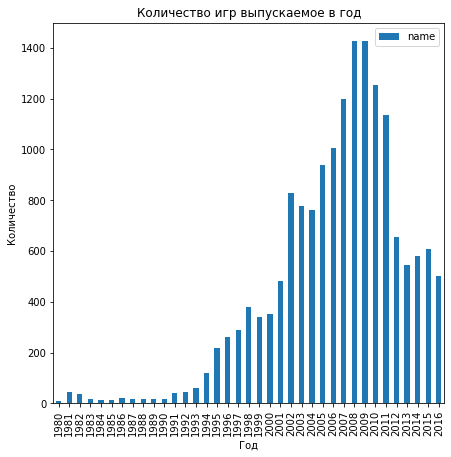

In [9]:
years = df.query('year_of_release != 0').pivot_table(index='year_of_release', values='name', aggfunc='count')
# не учитываем года, в которых пропущенное значение заменили на 0
years.plot(kind='bar', figsize=(7, 7))
plt.title('Количество игр выпускаемое в год')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Мы можем увидеть, что с выпуска первой игры в 1980 году за следующие 10 лет, темпы были не высокие, а вот начиная с 1991 года, количество выпускаемых игр начало расти. Как можно увидеть, пик выпуска приходится на 2008 и 2009 год, псоле этого идёт спад. Вероятно что этот спад обусловленным тем, что студии поняли, что нужно делать более качественные игры, а не гнаться за количеством, либо многие студии просто обанкротились из-за перенасыщения рынка играми.

- Рассмотрим 10 платформ с самым большим количеством продаж за всё время.

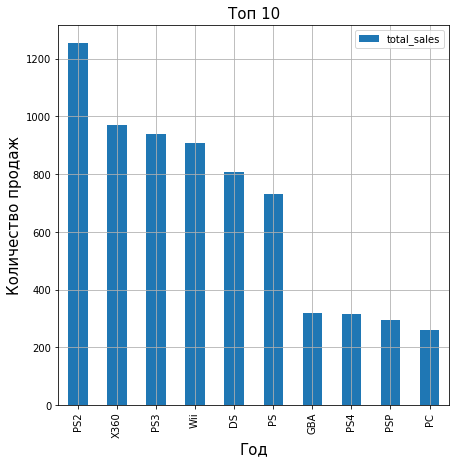

In [10]:
top_10_platform = (df
                   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
top_10_platform[:10].plot(kind='bar', figsize=(7, 7))
plt.title('Топ 10', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Количество продаж', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

Как видно на диограмме самая продаваемая платформа, до 2016 года, PS2.

Теперь рассмотрим продажи на эти 10 платформ по годам.

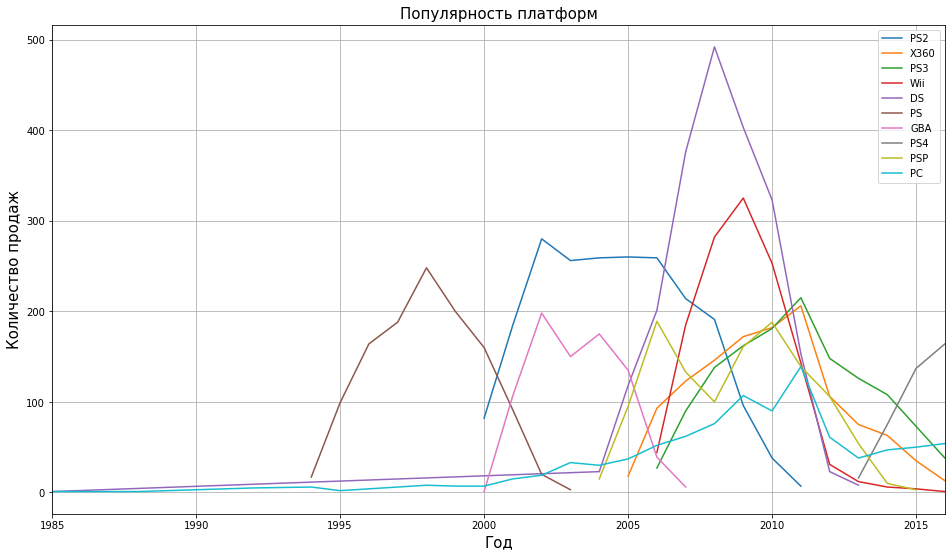

In [11]:
df_platfotm = df.query('year_of_release > 0')

for x in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']:
    platfom_top = df_platfotm[df_platfotm['platform']==x].groupby('year_of_release')['name'].count()
    platfom_top.plot(label=x, figsize=(16, 9))
    plt.title('Популярность платформ', fontsize=15)
    plt.xlabel('Год', fontsize=15)
    plt.ylabel('Количество продаж', fontsize=15)
    plt.legend()
    plt.grid(True)
plt.show()

Как видно, первопроходцами в создании "новых" консолей стали PSБ лишь спустя 6 лет появились другие производители консолей на рынке.В среднем платформа существует около 9-10 лет, от её появления до снятия с производства, а новые платформы появляются примерно каждые 5 лет. Также можно увидеть интересную особенность на примере PS, когда снимается с производства старая модель консоли у новой в этот момент времени наблюдается пик продаж. Также следует отметить PC, это единственная платформа, которая актуальна во все времена. Платформа DS имеет начало в 1985 году, а потом почти 20 лет тишины и только после 2004 есть данные, это или ошибка, либо её пытались запустить в 85, но потерпели "поражение".

- Прогноз на 2017 год.

Посмотрим прибыльность платформ за последние 2 года.

In [12]:
df[df['year_of_release'] >= 2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64

PS3, X360 и PS4 занимают первое, второе место и третье место с достаточным отрывом, а теперь рассмотрим как менялась динамика этих платформ за эти 2 года.

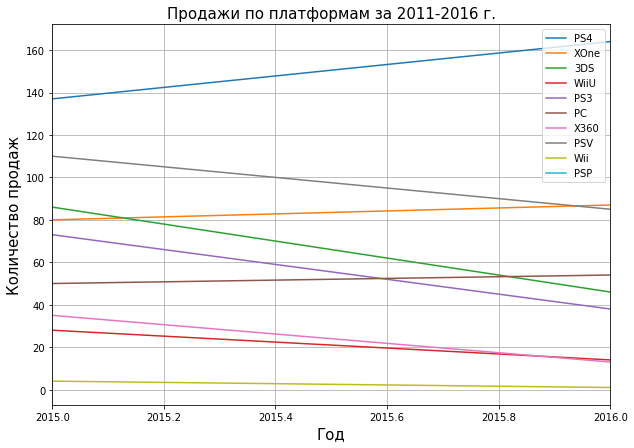

In [13]:
df_platfotm_2017 = df[df['year_of_release'] >= 2015]

for x in ['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii', 'PSP']:
    platfom_2017 = df_platfotm_2017[df_platfotm_2017['platform']==x].groupby('year_of_release')['total_sales'].count()
    platfom_2017.plot(label=x, figsize=(10, 7))
    plt.title('Продажи по платформам за 2011-2016 г.', fontsize=15)
    plt.xlabel('Год', fontsize=15)
    plt.ylabel('Количество продаж', fontsize=15)
    plt.legend()
    plt.grid(True)
plt.show()

Как видно, по динамике уже другая картина, хоть PS3 была на первом месте по продажам, её график имеет очень большие темпы спада, в то время, как новое поколение этой консоли, PS4, стремительно идёт вверх. Такая же ситуация и с платформой X360. У платформы PC, график схож с платформой X360, но имеет меньшие объемы прибыли. По остаьным же платформам наблюдается спад.

- Ящик с усами по глобальным продажам игр в разбивке по платформам.

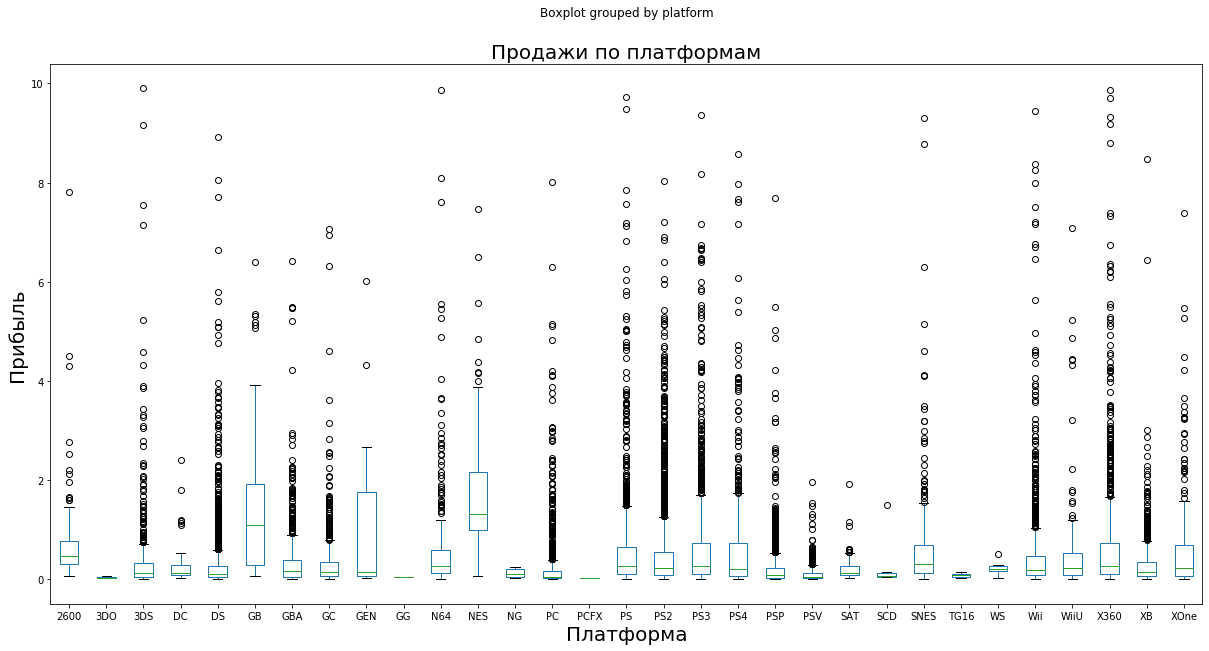

In [14]:
df.query(' 10 > total_sales').boxplot(by='platform', column='total_sales', grid=False, figsize=(20, 10))
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=20)
plt.ylabel('Прибыль', fontsize=20)
plt.show()

На диаграмме размаха мы можем увидеть, какие консоли сколько приносят денег, какие-то более прибыльные, какие-то менее. Значения, которые являются выброса, скорее всего это те игры, которые стали хитами на данных консолях, где-то их много(PS - PS4, X360, WiiU), а где-то мало(DC, SCD, WS) или даже нет(NG).

- Как влияют отзыва критиков и пользователей на продажи платформы, на примере PS4.

Зависимость общих продаж от оценок критиков: 0.39


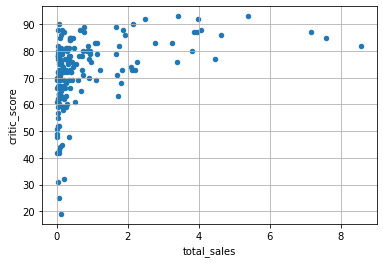

Зависимость общих продаж от оценок пользователей: -0.06


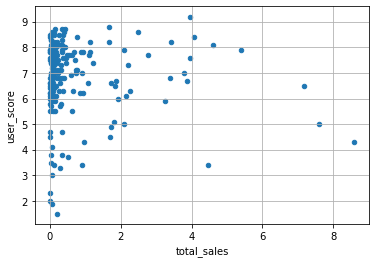

In [40]:
df_score = df_platfotm_2017.query('(platform == "PS4") and (critic_score != 0) and (user_score != 0) and (user_score != "tbd")')
df_score.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
sales_by_critic = df_score['total_sales'].corr(df_score['critic_score'])
print('Зависимость общих продаж от оценок критиков: {:.2f}'.format(sales_by_critic))
plt.show()
df_score['user_score'] = pd.to_numeric(df_score['user_score'], errors='ignore')
df_score.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
sales_by_user = df_score['total_sales'].corr(df_score['user_score'])
print('Зависимость общих продаж от оценок пользователей: {:.2f}'.format(sales_by_user))
plt.show()

Как видно явной зависимости между показателями нет. В общем-то критики больше влияют на прибыль консолей, чем пользователи. Для наглядности рассмотрим платформу PC.

Зависимость общих продаж от оценок критиков: 0.38


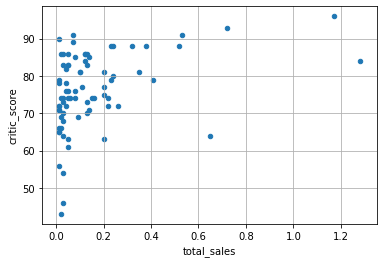

Зависимость общих продаж от оценок пользователей: 0.15


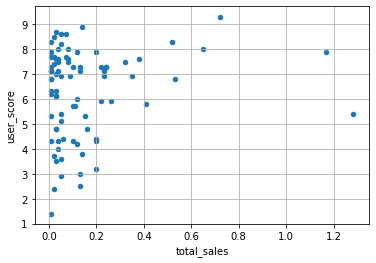

In [39]:
df_score = df_platfotm_2017.query('(platform == "PC") and (critic_score != 0) and (user_score != 0) and (user_score != "tbd")')
df_score.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
sales_by_critic = df_score['total_sales'].corr(df_score['critic_score'])
print('Зависимость общих продаж от оценок критиков: {:.2f}'.format(sales_by_critic))
plt.show()
df_score['user_score'] = pd.to_numeric(df_score['user_score'], errors='ignore')
df_score.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
sales_by_user = df_score['total_sales'].corr(df_score['user_score'])
print('Зависимость общих продаж от оценок пользователей: {:.2f}'.format(sales_by_user))
plt.show()

Как видно, здесь оценки критиков еще менее влиют на доход платформы, а оценки пользователей более влиятельны, п осравнению с PS4.

- Общее распределение игр по жанрам.

Теперь посмотрим, какие жанры самые прибыльные и на каких платформах.

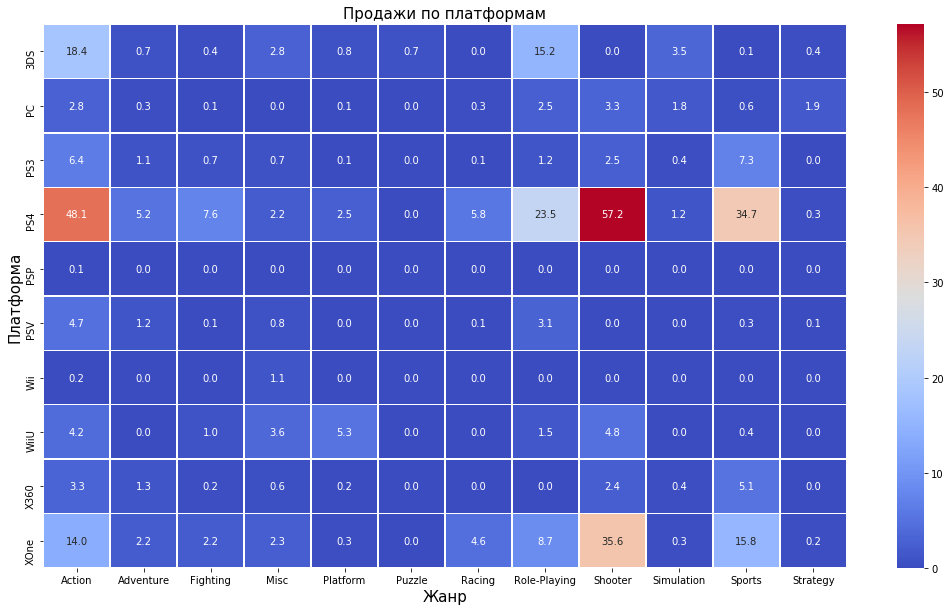

In [41]:
platform_genre_sales = df_platfotm_2017.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
plt.figure(figsize=(18, 10))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')
plt.title('Продажи по платформам', fontsize=15)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Платформа', fontsize=15)
plt.show()

Самые прибыльные жанры: action, misc, racing, shooter и sports.

Так же посмотрим, а на каких именно консолях прибылен каждый жанр:
- Action - PS4
- Adventure - PS4
- Fighting - PS4
- Misc - WiiU
- Platform - WiiU
- Puzzle - 3DS
- Racing - PS4
- Role-Playing - PS4
- Shooter - PS4
- Simulation - 3DS
- Sports - PS4
- Strategy - PC

Как видно, в большинстве случаев прибыльность жанров зависит от платформы, насколько удобно на ней играть в определенный жанр. Так как если в жанр не удобно играть на джостике, то он не будет приносить деньги с таких платформ. И стоит заметить, что больше половины жанров популярны на PS4.

### Вывод по разделу 3

Мы провели анализ и получили следующие выводы:
- в 2009 и 2010 году выпускалось самое большое количество игр с момента выпуска первой игры;
- самая прибильная платформа была PS2, на данный момент уже не выпускается;
- в среднем платформа существует 9-10 лет, а потом перестаётся выпускаться, только PC является исключением из этого прафила, он был на протяжении пути игровой индустрии;
- в ближайшие годы самые прибыльные платформы PS4 и XOne, а также PC;
- большую часть прибыли платформы получают за счет игр, которые "выстреливают" по популярности;
- отзывы критиков и пользователей имеют различную степень влияния на прибыль, в зависимости от платформы, где-то больше, где-то меньше;
- самые прибыльные жанры: action, shooter и sports.

<a id="step_4"></a>
# 4. Портрет пользователя каждого региона.

<a id="step_4_1"></a>
## Портрет пользователя NA.

Получим данные с пользователями NA.

In [42]:
df_na = df_platfotm_2017[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'raiting', 'total_sales']]
df_na = df_na.query('na_sales != 0')

- Топ 5 популярных платформ.

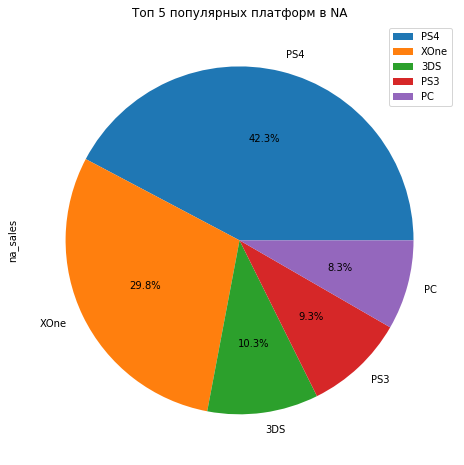

In [43]:
top_5_na_platform = (df_na
                .pivot_table(index='platform', values='na_sales', aggfunc='count')
                .sort_values(by='na_sales', ascending=False))
                
top_5_na_platform.head().plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 популярных платформ в NA')
plt.show()

Как видно, почти половину рынка занимаеь PS4, отдну треть XOne и почти поровну оставшиеся платформы.

- Топ 5 популярных жанров.

Рассмотрим 5 самых популярных жанров.

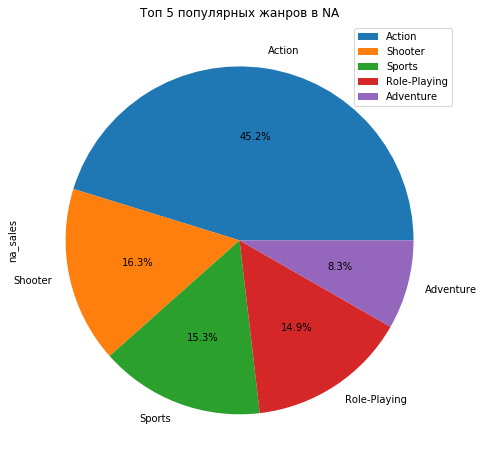

In [44]:
top_5_na_genre = (df_na
                .pivot_table(index='genre', values='na_sales', aggfunc='count')
                .sort_values(by='na_sales', ascending=False)
                .head())
top_5_na_genre.plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 популярных жанров в NA')
plt.show()

Жанр action является самых популярным жанром в мире, поэтому не удивительно, что он лидирует в регионе NA.

- Влияние рейтинга ESRB на продажи в регионе.

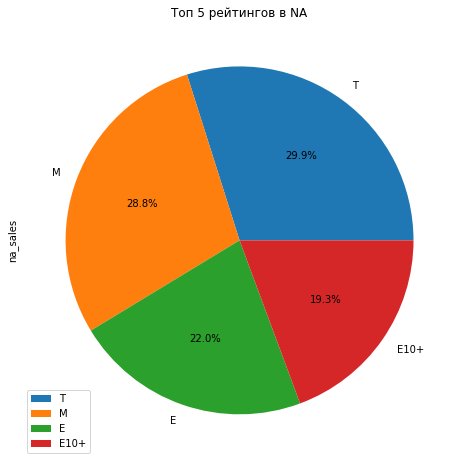

In [45]:
top_5_na_esrb = (df_na
                .pivot_table(index='raiting', values='na_sales', aggfunc='count')
                .sort_values(by='na_sales', ascending=False)
                .head())
top_5_na_esrb.plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в NA')
plt.show()

### Вывод.

Портрет пользователя NA:
- платформа PS4;
- жанр action;
- возрастной рейтинг T/M.

<a id="step_4_2"></a>
## Портрет пользователя EU.

Получем данные с пользователями EU.

In [46]:
df_eu = df_platfotm_2017[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'raiting', 'total_sales']]
df_eu = df_eu.query('eu_sales != 0')

- Топ 5 популярных платформ.

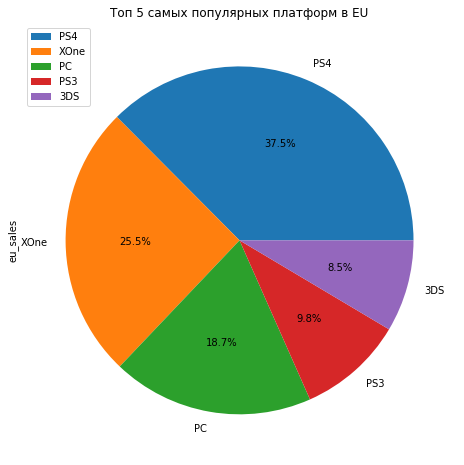

In [47]:
top_5_eu_platform = (df_eu
                .pivot_table(index='platform', values='eu_sales', aggfunc='count')
                .sort_values(by='eu_sales', ascending=False))
                
top_5_eu_platform.head().plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 самых популярных платформ в EU')
plt.show()

Как видно, в Европе уже другая ситуация. PS4 здесь занимается не почти половину рынка, а чуть больше 30%, на втором месте также XOne, на третье место вырывается PC.

- Топ 5 популярных жанров.

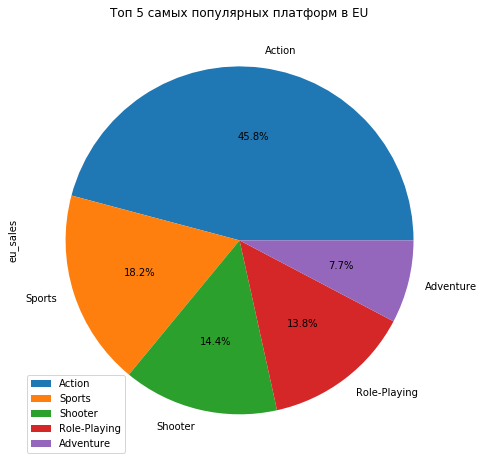

In [48]:
top_5_eu_platform = (df_eu
                .pivot_table(index='genre', values='eu_sales', aggfunc='count')
                .sort_values(by='eu_sales', ascending=False))
                
top_5_eu_platform.head().plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 самых популярных платформ в EU')
plt.show()

Ситауция с жанрами похожа на регион NA, только последовательность отличается.

- Топ 5 рейтинг.

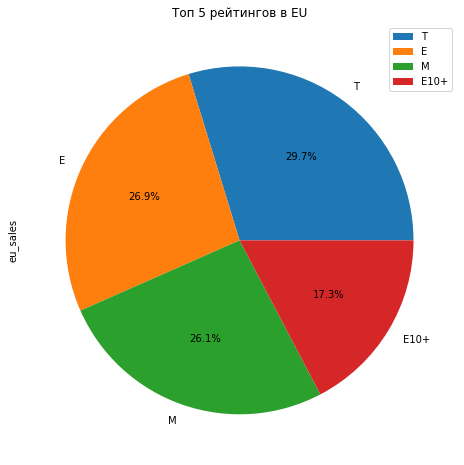

In [49]:
top_5_eu_esrb = (df_eu
                .pivot_table(index='raiting', values='eu_sales', aggfunc='count')
                .sort_values(by='eu_sales', ascending=False)
                .head())
top_5_eu_esrb.plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в EU')
plt.show()

### Вывод

Портрет пользователя EU:
- платформа PS4;
- жанр action;
- возрастной рейтинг T/E/M.

<a id="step_4_3"></a>
## Портрет пользователя JP.

In [50]:
df_jp = df_platfotm_2017[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'raiting', 'total_sales']]
df_jp = df_jp.query('jp_sales != 0')

- Топ 5 популярных платформ.

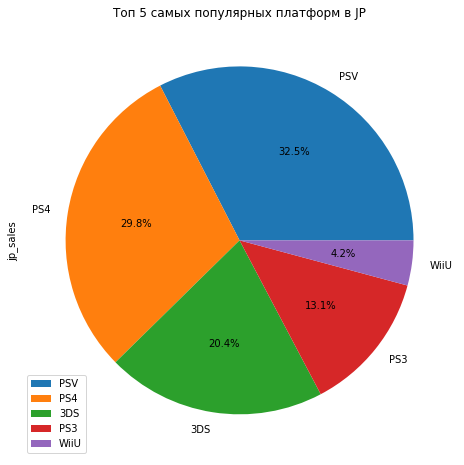

In [51]:
top_5_jp_platform = (df_jp
                .pivot_table(index='platform', values='jp_sales', aggfunc='count')
                .sort_values(by='jp_sales', ascending=False))
                
top_5_jp_platform.head().plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 самых популярных платформ в JP')
plt.show()

В этом регионе уже другая ситуация, на первом месте появляется PSV, а PS4 смещается на второе место, а платформы PC и XOne совсем пропали из топ платформ.

- Топ 5 популярных жанров.

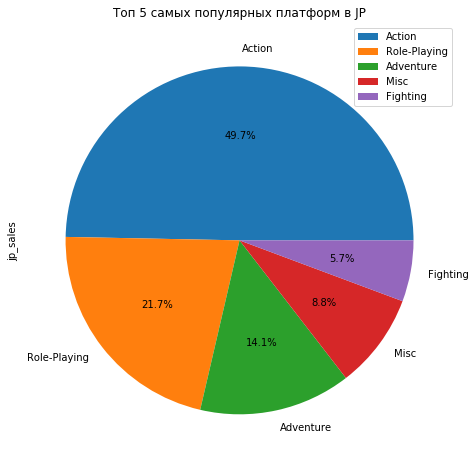

In [52]:
top_5_jp_platform = (df_jp
                .pivot_table(index='genre', values='jp_sales', aggfunc='count')
                .sort_values(by='jp_sales', ascending=False))
                
top_5_jp_platform.head().plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 самых популярных платформ в JP')
plt.show()

Жанр Action всё также занимает лидирующую строчку, появились необычные жанры, по сравнению с другими регионами, Misc и Fighting.

- Топ 5 рейтинг.

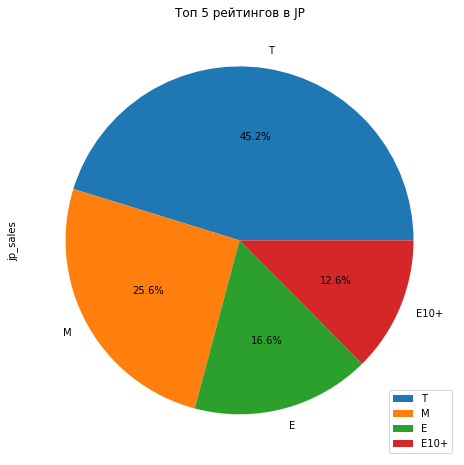

In [53]:
top_5_jp_esrb = (df_jp
                .pivot_table(index='raiting', values='jp_sales', aggfunc='count')
                .sort_values(by='jp_sales', ascending=False)
                .head())
top_5_jp_esrb.plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.title('Топ 5 рейтингов в JP')
plt.show()

### Вывод

Портрет пользователя JP:
- платформа PSV;
- жанр action;
- возрастной рейтинг T.

### Вывод по разделу 4

      Сделав портер пользователей по регионам, можно увидеть, что по платформам, жанрам и рейтингам есть много общего, но в то же время в каждом регионе есть черта, присущая только определенному региону. 
      В NA есть платформа Wii, в EU платформа PC и X360, в то время как в JP почти пвсе платформы PS.
      Жанры в NA и EU идентичны, отличается только популярность, в то время как в JP есть такие жанры как role-playing и adventure.
      Возрастной рейтинг в NA и EU схож, а вот в JP отличается, если в NA и EU первое место "Е", а второе "Т", в JP же наоборот.
      И типичный портрет будет выглядить так:
      Портрет пользователя NA:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T.
      Портрет пользователя EU:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T/E/M.
      Портрет пользователя JP:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T.

<a id="step_5"></a>
# 5. Проверка гипотез.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу (Н0). Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу (Н1). Средние пользовательские рейтинги платформ Xbox One и PC разные.

Используем тест Шапиро-Уилка, чтобы проверим генеральную совокупность на нормальность.

In [54]:
df_platfotm_2017['user_score'] = df_platfotm_2017['user_score'].replace(['tbd'], '0')
df_platfotm_2017['user_score'] = df_platfotm_2017['user_score'].fillna(0).astype('float')
df_user_score = df_platfotm_2017.query('user_score > 0')

In [55]:
stat, p = st.shapiro(df_user_score['user_score'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = .05
if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

Statistics=0.919, p-value=0.000
Отклонить гипотезу о нормальности


Как видно, наша генеральная совокупность не является нормальной. Теперь с помощью теста Левена оценим равенство дисперсий, используя р-значение.

In [56]:
df_user_score_pc = df_user_score.query('platform == "PC"')
df_user_score_xone = df_user_score.query('platform == "XOne"')

In [57]:
test_leven, p = st.levene(df_user_score_pc['user_score'], df_user_score_xone['user_score'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=3.289, p-value=0.071
Принять гипотезу о равенстве дисперсий


Мы принимаем гипотезу о равенстве дисперсий. Теперь с помощью `scipy.stats.ttest_ind` проверим средний пользовательский рейтинг платформ. А из-за теста левена поставим параметр `equal_var=True`.

In [58]:
alpha = .05

results = st.ttest_ind(
        df_user_score_pc['user_score'],
        df_user_score_xone['user_score'],
        equal_var=True)

print('р-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


`ttest` принял нулевую гипотезу(Н0), следовательно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу (Н0). Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Сформулируем нулевую гипотезу (Н1). Средние пользовательские рейтинги жанров Action и Sports разные.

Ранее проведенный тест Шапиро-Уилка показал, что нормальность не соблюдается, поэтому сразу перейдем к тесту Левена.

In [59]:
df_user_score_action = df_user_score.query('genre == "Action"')
df_user_score_sports = df_user_score.query('genre == "Sports"')

In [60]:
test_leven, p = st.levene(df_user_score_action['user_score'], df_user_score_sports['user_score'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha= .05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=20.144, p-value=0.000
Отклонить гипотезу о равенстве дисперсий


Здесь уже дисперсии не равны.

Теперь проверим нашу гипотезу с помощью `ttest_ind`.

In [61]:
alpha = .05
results = st.ttest_ind(
        df_user_score_action['user_score'],
        df_user_score_sports['user_score'],
        equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 5.97163549920592e-10
Отвергаем нулевую гипотезу


В данном случае получилось отвергнуть Н0, следовательно средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод по разделу 5

Нам нужно было проверить 2 гипотезы. 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу подвердилась.
2. Средние пользовательские рейтинги жанров Action и Sports разные. гипотеза опроверглась.

<a id="step_6"></a>
# 6. Общий вывод.

Проведя анализ игровой индустрии, мы получили следующие результаты:
- Начиная с 1980 и по 2009 год, количество игр, выпускаемых в год, росло;
- 2009 и 2010 года были самыми пиковыми значениями по количеству выпущеных игр;
- После 2010 года был спад выпускаемых игр;
- 1 место по количеству проданных платформ занимает PS2;
- Всреднем платформа существует 9-10 лет, с момента начала выпуска и до снятия с производства;
- Выделили платформы, на которые стоит ориетироваться, для получения максимальной прибыли, PS4, XOne и PC;
- Выяснили, что оценки критиков больше влияют на популярность игр, чем оценки пользователей;
- Выяснили какие жанры популярны и на каких платформах;
- Большую часть прибыли платформы получают за счет игр, которые "выстреливают" по популярности, вероятно это эксклюзивы;
- Самые прибыльные жанры: action, shooter и sports;
- Составили 3 портрета пользователей, исходя из региона, NA, EU или JP:
  1. Портрет пользователя NA:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T.
  2. Портрет пользователя EU:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T/E/M.
  3. Портрет пользователя JP:
       - платформа PS4;
       - жанр action;
       - возрастной рейтинг T.
- Проверили гипотезы:
  1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу подвердилась.
  2. Средние пользовательские рейтинги жанров Action и Sports разные. гипотеза опроверглась.
      
Для получения большей прибыли в различных регионах, следует придерживаться следующего:
- Na. Делать упор на платформу PS4 и XOne, вместе они занимают более 60% рынка, что принесет хорошую прибыль. Жанр стоит выбирать Action и shooter/sports/role-playing, возрастной рейтинг Т и М;
- EU. Также преимущуственно упор на PS4 и XOne, можно обратить внимание на PC, это ещё плюс 20% рынка. Жанр Action и sports/shooter/role-playing, возрастнйо рейтинг T/E/M;
- JP. Платформы PSV, PS4 и 3DS. Жанры Action, role-playin и adventure, возрастной рейтинг Т, М, Е/Е10+.